# Regresion in skikit-learn

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#other
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
# how to select two colomn
df_linear=df[["age","fare"]]
df_linear

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


# simple linear regression

In [8]:
#simple Linear Regression
#x=df[['age']]
#y=df['fare']


In [16]:
df_linear['age']=df_linear.age.fillna(value=df_linear['age'].mean())

C:\Users\User\AppData\Local\Temp\ipykernel_16640\953954443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_linear['age']=df_linear.age.fillna(value=df_linear['age'].mean())


In [17]:
df_linear.isnull().sum()/len(df_linear)*100

age     0.0
fare    0.0
dtype: float64

In [11]:
x

,age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [12]:
x.shape

(891, 1)

In [13]:
y.shape

(891,)

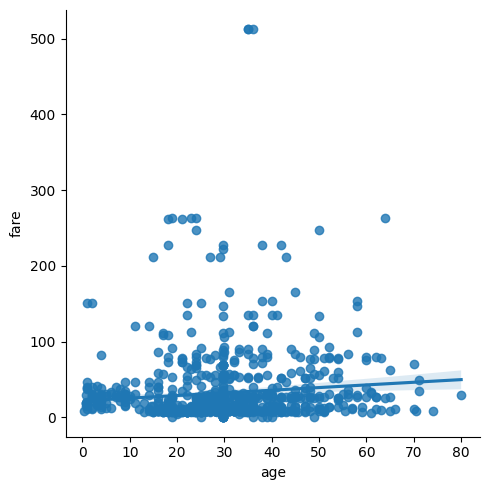

In [20]:
#plot
sns.lmplot(data=df_linear,x='age',y='fare')

<Axes: ylabel='age'>

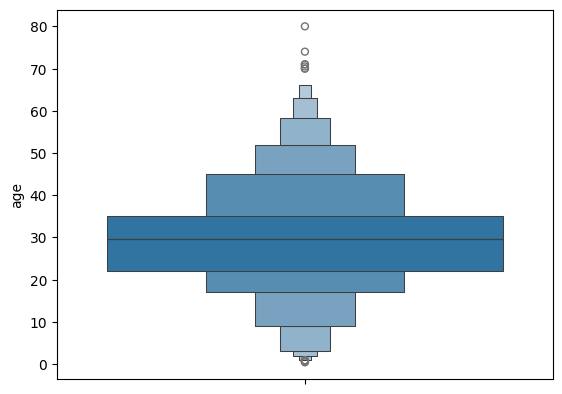

In [22]:
sns.boxenplot(data=df_linear,y='age')

In [24]:
df_linear=df_linear[(df_linear['age']>8)& (df_linear['age']<50)]

<Axes: ylabel='age'>

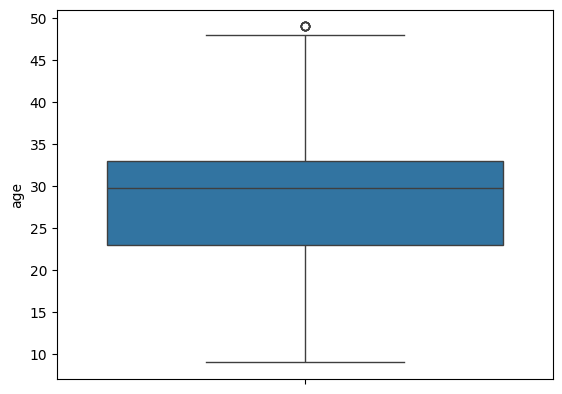

In [27]:
sns.boxplot(data=df_linear,y='age')

<Axes: ylabel='fare'>

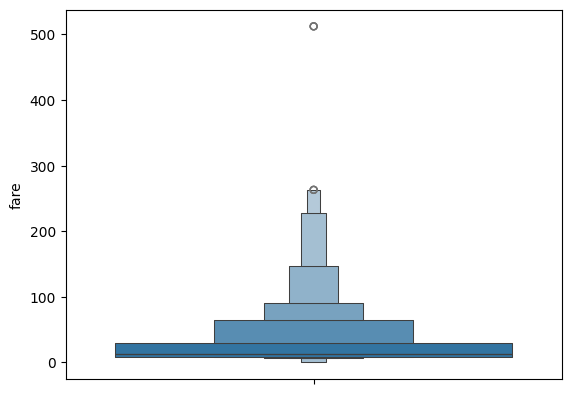

In [28]:
sns.boxenplot(data=df_linear,y='fare')

In [30]:
df_linear['fare'].min()

0.0

In [32]:
df_linear=df_linear[(df_linear['age']>1)& (df_linear['age']<40)]

<Axes: ylabel='fare'>

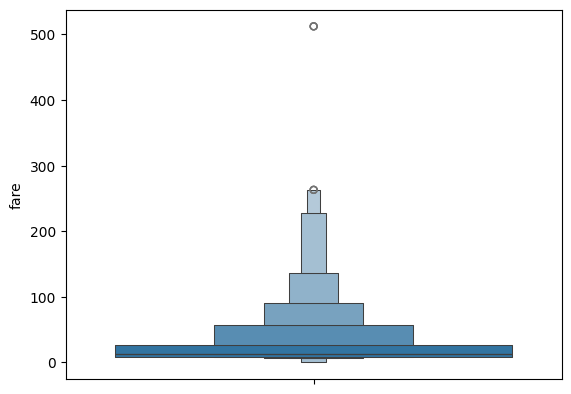

In [33]:
sns.boxenplot(data=df_linear,y='fare')

In [48]:
x=df_linear[['age']]
y=df_linear['fare']

In [49]:
x

,age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [50]:
y

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 674, dtype: float64

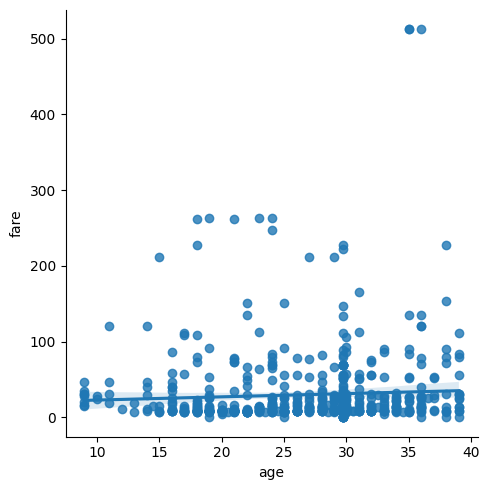

In [51]:
sns.lmplot(data=df_linear,x='age',y='fare')

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#model
model=LinearRegression()

#train model
model.fit(x,y)
#predict
model.predict([[50]])

c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([39.8536775])

In [57]:
#predict
model.predict([[50]])

c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([39.8536775])

In [65]:
#model evaulation with matrix
#r2
#mean squre error
#MAE
#MSE

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

#model
model=LinearRegression()

#train
model.fit(x_train,y_train)

#predict
pridection=model.predict(x_test)



<Axes: xlabel='fare'>

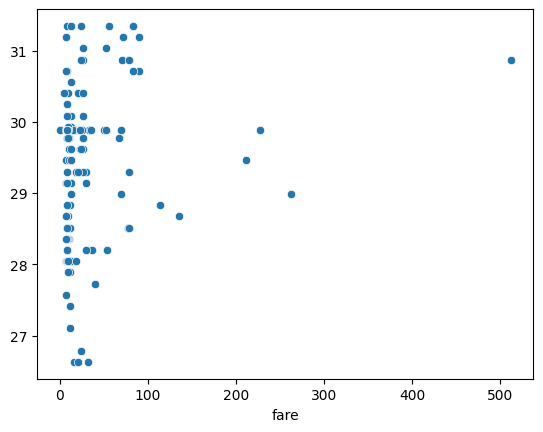

In [67]:
#compare
sns.scatterplot(x=y_test,y=pridection)

In [68]:
model.score(x_test,y_test)

0.003315661308005091

In [73]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
MAE=mean_absolute_error(y_true=y_test,y_pred=pridection)
MSE=mean_squared_error(y_true=y_test,y_pred=pridection)
RMSE=mean_squared_error(y_true=y_test,y_pred=pridection,squared=False)
R2=r2_score(y_true=y_test,y_pred=pridection)    